# Wine Quality
*Team Members: Caroline Miller, Aaron Moore*


## Imports

In [1]:
# getting imports
from wrangle_wine import merge_wine, wrangle_wine

import stats_wine as sw
import explore as e
from explore import quality_dis
import modeling

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'white_wine']
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## Acquire

* Acquired two datasets from data.world on 2023-04-14
* Saved the dataset as csv files and merged them 
* After merging:
    * Observations: 6,497 wines on file
    * Features: 13 features representing different wine characteristics

In [2]:
# Import acquired messy data from your acquire file here
df = merge_wine()

In [3]:
df.sample(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_or_white
3392,7.4,0.35,0.31,17.95,0.062,42.0,187.0,1.00020,3.27,0.64,9.1,5,white
825,7.1,0.46,0.14,2.80,0.076,15.0,37.0,0.99624,3.36,0.49,10.7,5,red


## Prepare

* Removed outliers using the IQR * 1.5 method
* No null values were present
* Changed names to be python friendly
* Encoded and scaled data
* Split data into train, validate, test

In [4]:
# importing wrangled data
train, validate, test,\
train_scaled, validate_scaled, test_scaled = wrangle_wine()

## Explore
* 

**The following empty code block** is here to represent the countless questions, visualizations, and statistical tests 
that did not make your final report. Data scientist often create a myriad of questions, visualizations 
and statistical tests that do not make it into the final notebook. This is okay and expected. Remember 
that shotgun approaches to your data such as using pair plots to look at the relationships of each feature 
are a great way to explore your data, but they have no place in your final report. 
**Your final report is about showing and supporting your findings, not showing the work you did to get there!**

### 1) What is the distribution of the wine quality?

In [5]:
### 2) Visualization of the data answering the question
# * Use your chart title to provide the main take-away from each visualization
# * Each visualization should answer one, and only one, of the explore questions

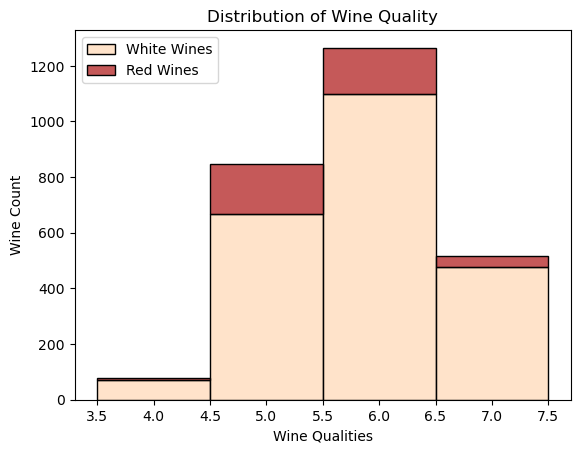

In [6]:
quality_dis(train)

##### Takeaways:
* The majority of the wines are white wines
* The majority of the wines have a quality rating 6
* There are more higher quality wines than lower quality


#### Answer to the question
* Answer the question you posed of the data by referring to the chart and statistical test (if you used one)
* If the question relates to drivers, explain why the feature in question would/wouldn't make a good driver

### 2) What is the relationship between wine quality and volatile acidity?

In [7]:
# Visualization of the data answering the question
# * Visualizations should be accompanied by take-aways telling the reader exactly what you want them to get from the chart
# * You can include theses as bullet points under the chart
# * Use your chart title to provide the main take-away from each visualization
# * Each visualization should answer one, and only one, of the explore questions

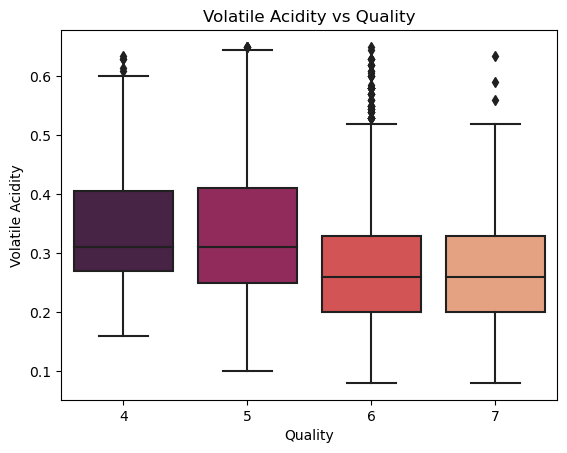

In [8]:
e.volatile_acidity_vis(train)

##### Takeaways:
* The higher quality wines have lower volatile acidities and the lower quality of wines have higher volatile acidities

#### Statistical Testing
##### Levene Test :
>- H$_0$: Higher quality wines volatile acidity and lower quality wines volatile acidity have equal variance.
>- H$_a$: Higher quality wines volatile acidity and lower quality wines volatile acidity do **not** have equal variance.
>- Confidence Interval: 95%
>- $a$: 0.05

In [9]:
# get stats results
sw.get_va_lv()

We can reject the null hypothesis with a p-value of 1.459186755356841e-09


##### Mann-Whitney:
>- H$_0$: There is no difference between higher quality wines volatile acid and lower quality wines volatile acidity
>- H$_a$: There is a difference between higher quality wines volatile acidity and lower quality wines volatile acidity
>- Confidence Interval: 95%
>- $a$: 0.05

In [10]:
# get stats results
sw.get_va_mw()

We can reject the null hypothesis with a p-value of 1.4681458726460203e-40


### Answer to the question
* Answer the question you posed of the data by referring to the chart and statistical test (if you used one)
* If the question relates to drivers, explain why the feature in question would/wouldn't make a good driver

### 3) What is the relationship between wine quality and alcohol? 

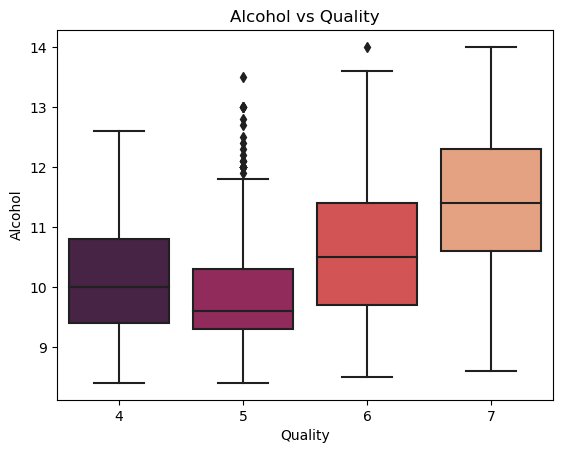

In [11]:
e.alcohol_vis(train)

##### Takeaways:
* The higher quality wines have higher alcohol content and the lower quality wines have lower alcohol content

### 2) Visualization of the data answering the question

* Visualizations should be accompanied by take-aways telling the reader exactly what you want them to get from the chart
* You can include theses as bullet points under the chart
* Use your chart title to provide the main take-away from each visualization
* Each visualization should answer one, and only one, of the explore questions

#### Statistical Testing
##### Levene Test:
>- H$_0$: Higher quality wines alcohol and lower quality wines alcohol have equal variance.
>- H$_a$: Higher quality wines alcohol and lower quality wines alcohol do **not** have equal variance.
>- Confidence Interval: 95%
>- $a$: 0.05

In [12]:
# gettiing stats results
sw.get_alcohol_lv()

We can reject the null hypothesis with a p-value of 3.169462244506217e-45


##### Mann-Whitney:
>- H$_0$: There is no difference between higher quality wines alcohol and lower quality wines alcohol
>- H$_a$: There is a difference between higher quality wines alcohol and lower quality wines alcohol
>- Confidence Interval: 95%
>- $a$: 0.05

In [13]:
# getting stats results
sw.get_alcohol_mw()

We can reject the null hypothesis with a p-value of 3.1240584154670644e-95


### Answer to the question
* Answer the question you posed of the data by referring to the chart and statistical test (if you used one)
* If the question relates to drivers, explain why the feature in question would/wouldn't make a good driver

### 4) What is the relationship between wine quality and density?

### Visualization of the data answering the question

* Visualizations should be accompanied by take-aways telling the reader exactly what you want them to get from the chart
* You can include theses as bullet points under the chart
* Use your chart title to provide the main take-away from each visualization
* Each visualization should answer one, and only one, of the explore questions

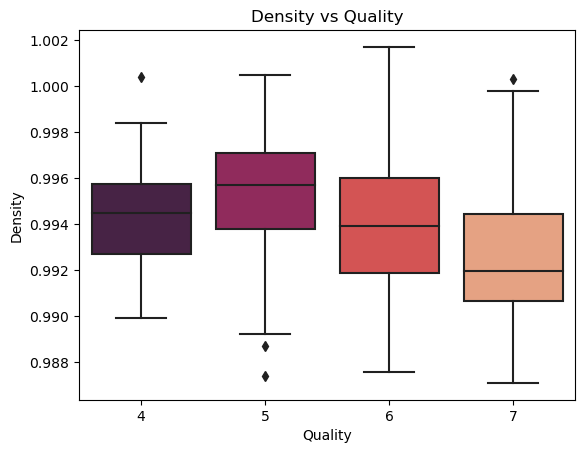

In [14]:
e.density_vis(train)

##### Takeaways:
* Higher quality wines have lower desnities and lower quality wines have densities in the mid to higher range

#### Statistical Testing
##### Levene Test:
>- H$_0$: Higher quality wines' density and lower quality wines' density have equal variance.
>- H$_a$: Higher quality wines density' and lower quality wines' density do **not** have equal variance.
>- Confidence Interval: 95%
>- $a$: 0.05

In [15]:
# getting stats results
sw.get_density_lv()

We can reject the null hypothesis with a p-value of 1.2756207455735509e-15


##### Mann-Whitney:
>- H$_0$: There is no difference between higher quality wines density and lower quality wines density
>- H$_a$: There is a difference between higher quality wines density and lower quality wines density
>- Confidence Interval: 95%
>- $a$: 0.05

In [16]:
# getting stats results
sw.get_density_mw()

We can reject the null hypothesis with a p-value of 1.2478925168718082e-51


###  Answer to the question
* Answer the question you posed of the data by referring to the chart and statistical test (if you used one)
* If the question relates to drivers, explain why the feature in question would/wouldn't make a good driver

### 5) What is the relationship between wine quality and chlorides?

### Visualization of the data answering the question

* Visualizations should be accompanied by take-aways telling the reader exactly what you want them to get from the chart
* You can include theses as bullet points under the chart
* Use your chart title to provide the main take-away from each visualization
* Each visualization should answer one, and only one, of the explore questions

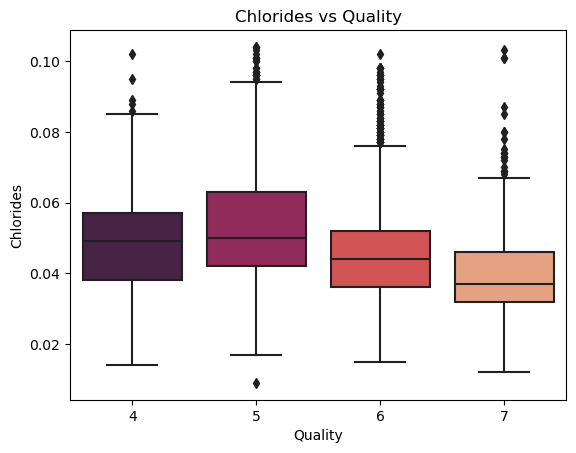

In [17]:
e.chlorides_vis(train)

##### Takeaways:
* Higher quality wines have lower levels and lower qualities have higher levels of chlorides

#### Statistical Testing
##### Levene Test:
>- H$_0$: Higher quality wines' chlorides and lower quality wines' chlorides have equal variance.
>- H$_a$: Higher quality wines' chlorides and lower quality wines' chlorides do **not** have equal variance.
>- Confidence Interval: 95%
>- $a$: 0.05

In [18]:
# getting stats results
sw.get_chlorides_lv()

We can reject the null hypothesis with a p-value of 3.890765888691501e-05


##### Mann-Whitney:
>- H$_0$: There is no difference between higher quality wines chlorides and lower quality wines chlorides
>- H$_a$: There is a difference between higher quality wines chlorides and lower quality wines chlorides
>- Confidence Interval: 95%
>- $a$: 0.05

In [19]:
# getting stats results
sw.get_chlorides_mw()

We can reject the null hypothesis with a p-value of 6.904700790278716e-42


### Answer to the question
* Answer the question you posed of the data by referring to the chart and statistical test (if you used one)
* If the question relates to drivers, explain why the feature in question would/wouldn't make a good driver

## Exploration Summary
* After your explore section, before you start modeling, provide a summary of your findings in Explore
* Include a summary of your take-aways
* Include a summary of the features you examined and weather or not you will be going to Modeling with each feature and why
* It is important to note which features will be going into your model so the reader knows what features you are using to model on

## Modeling

### Introduction
* Explain how you will be evaluating your models
* Include the evaluation metric you will be using and why you have chosen it
* Create a baseline and briefly explain how it was calculated 

In [20]:
# If you use code to generate your baseline run the code and generate the output here

In [21]:
modeling.classification_eval_dict()

,train_score,validate_score,difference
Baseline,0.467,0.467,0.000
DecisionTreeClassifier(max_depth=12),0.905,0.596,0.310
"RandomForestClassifier(max_depth=8, min_samples_leaf=3)",0.748,0.587,0.161
Logistic Regression,0.570,0.549,0.021
KNeighborsClassifier(n_neighbors=6),0.693,0.426,0.267


In [25]:
modeling.regression_eval_dict()

,RMSE_train,RMSE_validate,R2_validate
Baseline,0.786,0.785,0.000
OLS_Regressor,0.707,0.723,0.107
LassoLars(alpha=1),0.786,0.785,0.000
"TweetieRegressor_GLM(power=1, alpha=0)",0.707,0.724,0.106
Polynomial_Regression,0.679,0.714,0.127


Printout should read: <br>
Baseline: "number" "evaluation metric"

### Best 3 Models
* Show the three best model results obtained using your selected features to predict the target variable
* Typically students will show the top models they are able to generate for three different model types

## You may use this as a template for how to introduce your models:

### Model Type

In [22]:
# Code that runs the best model in that model type goes here 
# (This may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on train: "evaluation result" <br>
"evaluation metric" on validate: "evaluation result"

### Test Model
* Choose the best model out of the three as you best model and explain why you have chosen it
* Explain that you will now run your final model on test data to gauge how it will perform on unseen data

In [23]:
# Code that runs the best overall model on test data (this may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on Test: "evaluation result" <br>

### Modeling Wrap 
* Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production

## Conclusion

### Summery
* Summarize your findings and answer the questions you brought up in explore 
* Summarize how drivers discovered lead or did not lead to a successful model 

### Recommendations
* Recommendations are actions the stakeholder should take based on your insights

### Next Steps
* Next Steps are what you, as a Data Scientist, would do if provided more time to work on the project

**Where there is code in your report there should also be code comments telling the reader what each code block is doing. This is true for any and all code blocks even if you are using a function to import code from a module.**
<br>
<br>
**Your Notebook should contain adequate markdown that documents your thought process, decision making, and navigation through the pipeline. As a Data Scientist, your job does not end with making data discoveries. It includes effectively communicating those discoveries as well. This means documentation is a critical part of your job.**

# README

Your README should contain all of the following elements:

* **Title** Gives the name of your project
* **Project Description** Describes what your project is and why it is important 
* **Project Goal** Clearly states what your project sets out to do and how the information gained can be applied to the real world
* **Initial Hypotheses** Initial questions used to focus your project 
* **Project Plan** Guides the reader through the different stages of the pipeline as they relate to your project
* **Data Dictionary** Gives a definition for each of the features used in your report and the units they are measured in, if applicable
* **Steps to Reproduce** Gives instructions for reproducing your work. i.e. Running your notebook on someone else's computer.